In [3]:
import pandas as pd
import numpy as np

COLUMNS = ['timestamp', 'xAxis', 'yAxis', 'zAxis']
STANDING = pd.read_csv('../Data/Standing_1462486804782.csv', header=None, names=COLUMNS)[:3000]
WALKING = pd.read_csv('../Data/Walking_1462487070722.csv', header=None, names=COLUMNS)[:3000]
RUNNING = pd.read_csv('../Data/Running_1462487326006.csv', header=None, names=COLUMNS)[:3000]
STAIRS = pd.read_csv('../Data/Stairs_1462487242397.csv', header=None, names=COLUMNS)[:3000]
ON_TRAIN = pd.read_csv('../Data/Train_1462518004872.csv', header=None, names=COLUMNS)[:3000]

STANDING.head()

,timestamp,xAxis,yAxis,zAxis
0,1462486804801,0.260968,-0.056862,9.611523
1,1462486804801,0.260968,-0.056862,9.611523
2,1462486804801,0.260968,-0.056862,9.611523
3,1462486804801,0.260968,-0.056862,9.611523
4,1462486804801,0.260968,-0.056862,9.611523


In [73]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, activity['timestamp'], activity['xAxis'], 'x Axis')
    plot_axis(ax1, activity['timestamp'], activity['yAxis'], 'y Axis')
    plot_axis(ax2, activity['timestamp'], activity['zAxis'], 'z Axis')
    plt.subplots_adjust(hspace=0.2)
    plt.show()
    

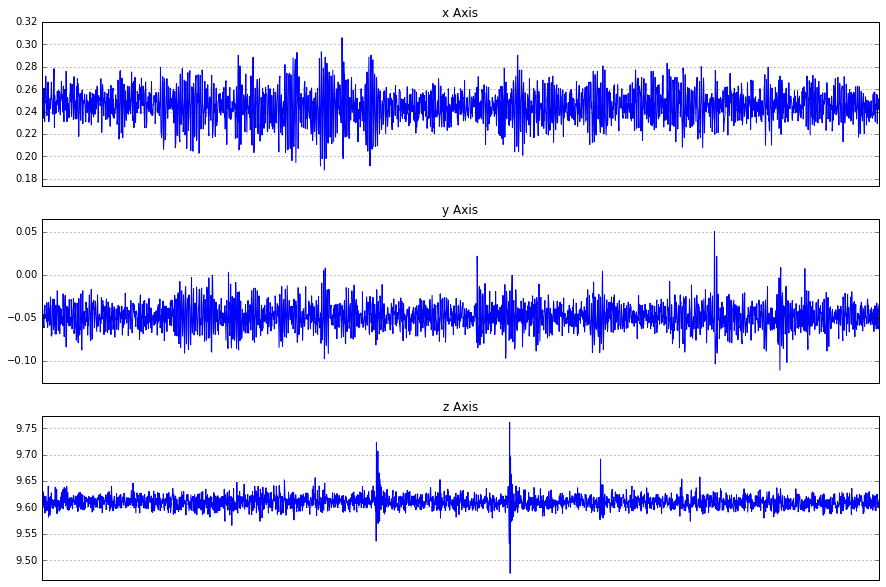

In [74]:
plot_activity(STANDING)

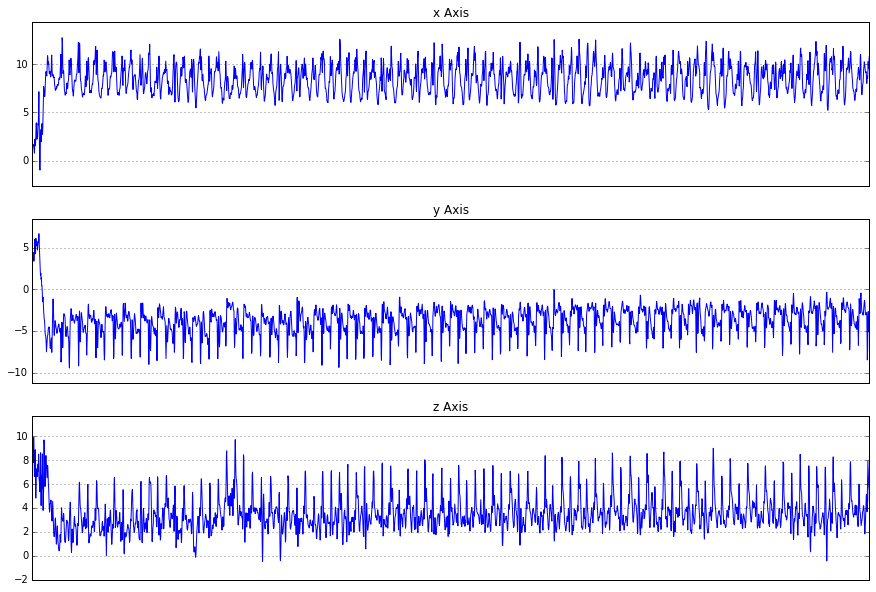

In [75]:
plot_activity(WALKING)

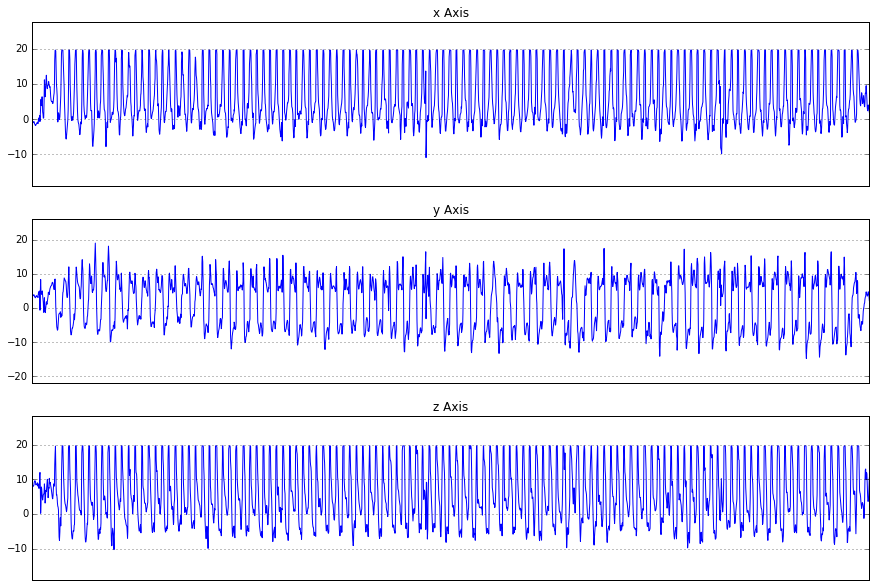

In [76]:
plot_activity(RUNNING)

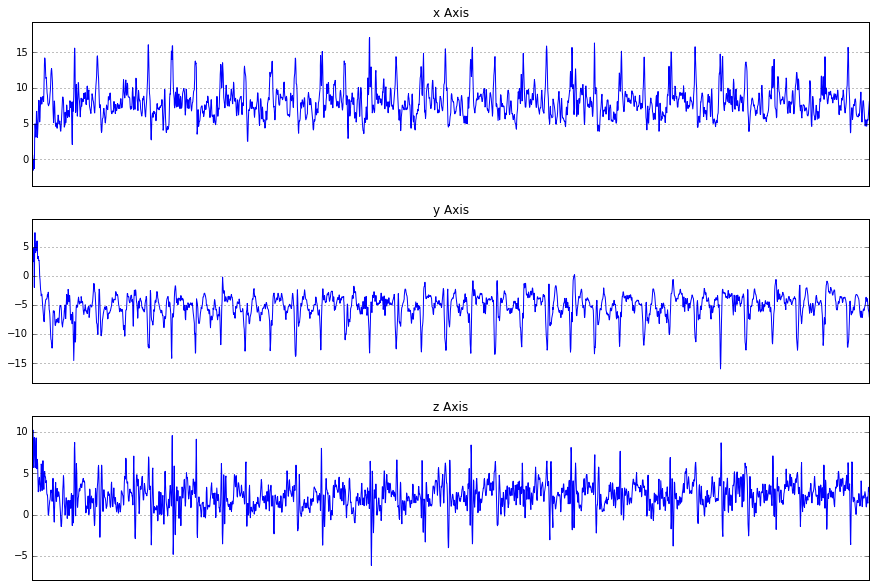

In [77]:
plot_activity(STAIRS)

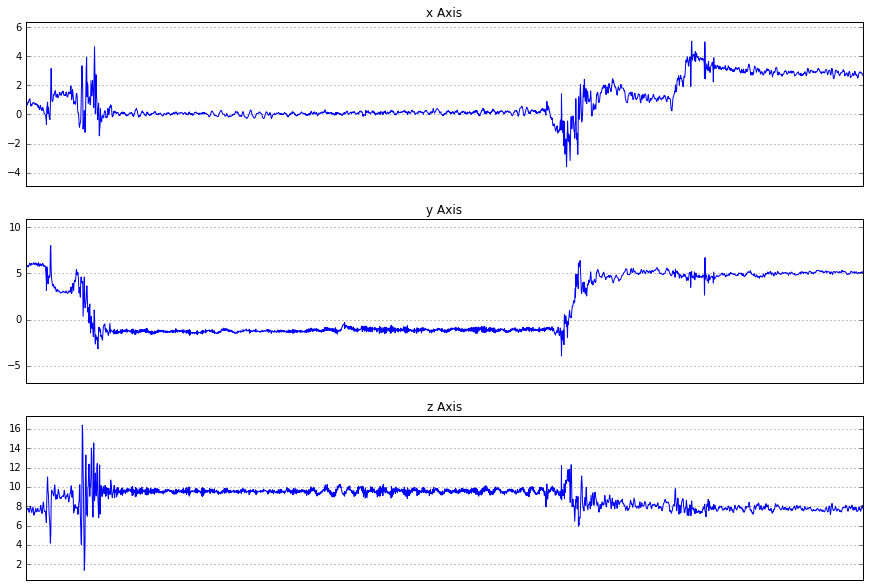

In [78]:
plot_activity(ON_TRAIN)

In [79]:
import math

def magnitude(activity):
    x2 = activity['xAxis'] * activity['xAxis']
    y2 = activity['yAxis'] * activity['yAxis']
    z2 = activity['zAxis'] * activity['zAxis']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m

In [80]:
STANDING['magnitude'] = magnitude(STANDING)
WALKING['magnitude'] = magnitude(WALKING)
RUNNING['magnitude'] = magnitude(RUNNING)
STAIRS['magnitude'] = magnitude(STAIRS)
ON_TRAIN['magnitude'] = magnitude(ON_TRAIN)

In [81]:
def plot_magnitudes(activities, titles):
    fig, axs = plt.subplots(nrows=len(activities), figsize=(15, 15))
    for i in range(0, len(activities)):
        plot_axis(axs[i], activities[i]['timestamp'], activities[i]['magnitude'], titles[i])
    plt.subplots_adjust(hspace=0.2)
    plt.show()


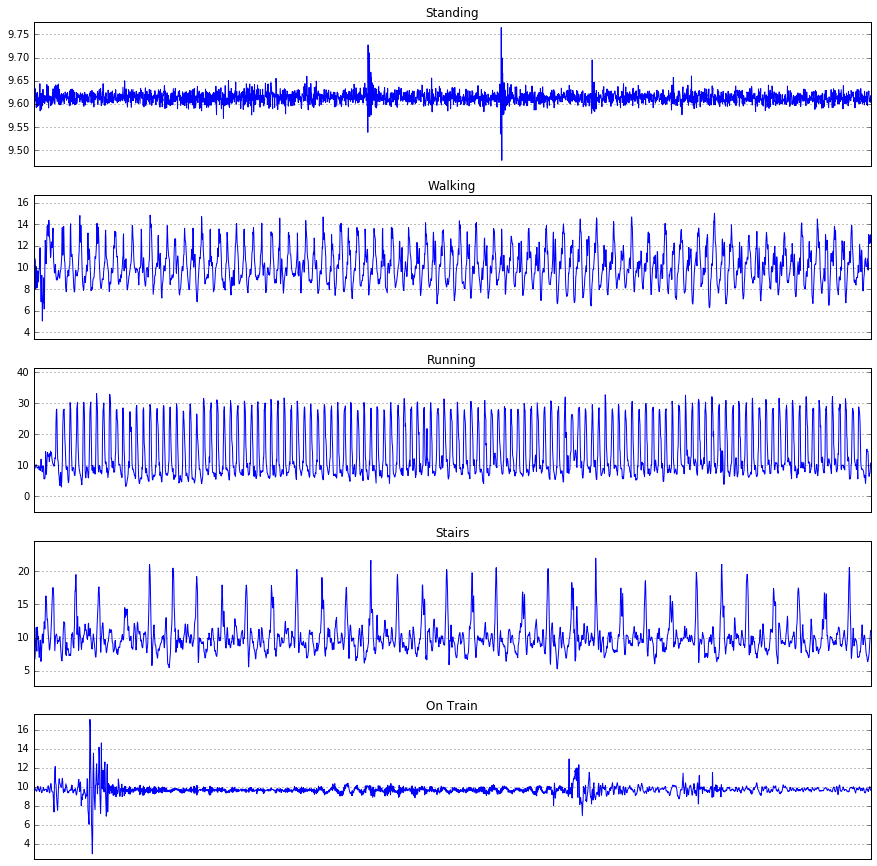

In [82]:
plot_magnitudes([STANDING, WALKING, RUNNING, STAIRS, ON_TRAIN],
               ['Standing', 'Walking', 'Running', 'Stairs', 'On Train'])